# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

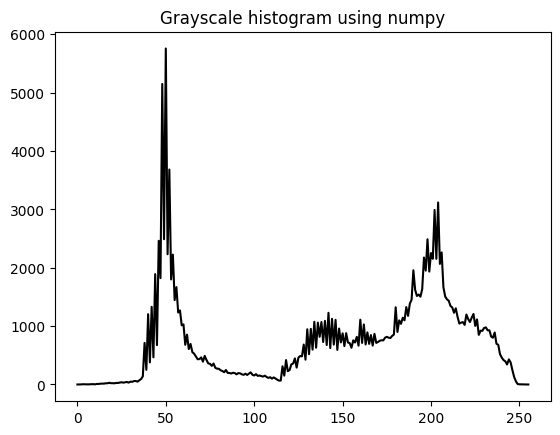

In [8]:
#grayscale histogram
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
img=Image.open("Image_1.jpg").convert("L") #open image as grayscale
gray_img=np.array(img)
def gray_histogram(gray_img): #grayscale histogram function
    hist=np.zeros(256,dtype=int)
    rows,cols=gray_img.shape
    for i in range(rows):
        for j in range(cols):
            pixel=gray_img[i,j]
            hist[pixel]+=1
    return hist
plt.plot(hist,color='black')
plt.title("Grayscale histogram using numpy")
plt.show()


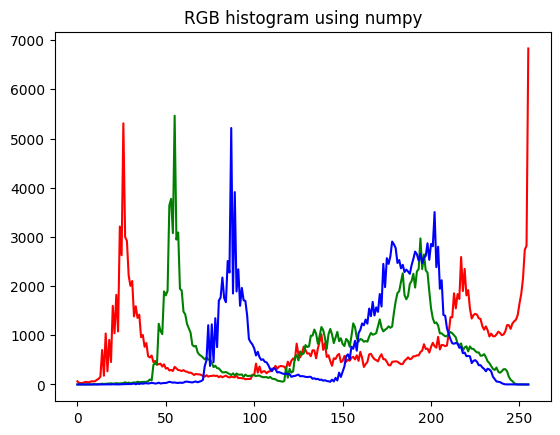

In [9]:
#RGB histogram
img_rgb=Image.open("Image_1.jpg").convert("RGB")  #open image as rgb
rgb_img=np.array(img_rgb)
def rgb_histogram(rgb_img):                       #rgb histogram function
    hist_R=np.zeros(256,dtype=int)
    hist_G=np.zeros(256,dtype=int)
    hist_B=np.zeros(256,dtype=int)
    rows,cols,_=rgb_img.shape
    for i in range(rows):
        for j in range(cols):
            r,g,b=rgb_img[i,j]
            hist_R[r]+=1
            hist_G[g]+=1
            hist_B[b]+=1
    return hist_R,hist_G,hist_B
plt.plot(hist_R,color='red')
plt.plot(hist_G,color='green')
plt.plot(hist_B,color='blue')
plt.title("RGB histogram using numpy")
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [11]:
def rgb_to_hsv(rgb_img):
    rgb=rgb_img.astype(float)/255.0
    R=rgb[:,:,0]
    G=rgb[:,:,1]
    B=rgb[:,:,2]
    Cmax=np.max(rgb,axis=2)
    Cmin=np.min(rgb,axis=2)
    delta=Cmax-Cmin
    H=np.zeros_like(Cmax) #hue variable
    mask=delta!=0
    r_mask=(Cmax==R)&mask #we apply conditions for hue
    g_mask=(Cmax==G)&mask
    b_mask=(Cmax==B)&mask
    H[r_mask]=(60*((G[r_mask]-B[r_mask])/delta[r_mask])+360)%360
    H[g_mask]=(60*((B[g_mask]-R[g_mask])/delta[g_mask])+120)%360
    H[b_mask]=(60*((R[b_mask]-G[b_mask])/delta[b_mask])+240)%360
    S=np.zeros_like(Cmax) #saturation variable
    S[Cmax!=0]=delta[Cmax!=0]/Cmax[Cmax!=0]
    V=Cmax #value variable
    H_out=(H/2).astype(np.uint8)
    S_out=(S*255).astype(np.uint8)
    V_out=(V*255).astype(np.uint8)
    hsv=np.stack([H_out,S_out,V_out],axis=2)
    return hsv


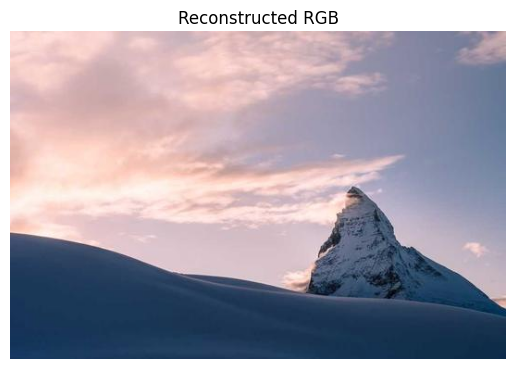

In [12]:
import cv2
hsv_c=rgb_to_hsv(rgb_img)
#we convert back to RGB using opencv and it should look the same as the original image
rgb_reconstructed=cv2.cvtColor(hsv_c,cv2.COLOR_HSV2RGB)
plt.imshow(rgb_reconstructed)
plt.title("Reconstructed RGB")
plt.axis("off")
plt.show()


In [ ]:
#we get the RGB image to be the same as the original image

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

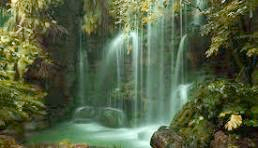

'\n1. I chose hue rotation and contrast adjustment because they fundamentally change the mood of the photo.\n2. They suit landscape images by adding warmth(hue) and definition(contrast), so that they have the colors of a sunset.\n'

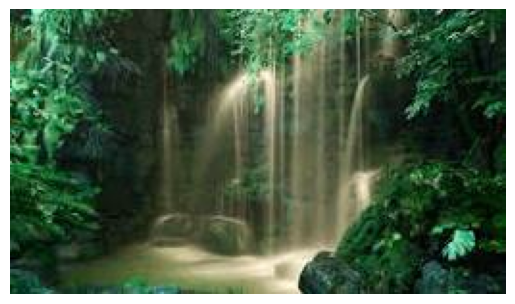

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#Filter using hues and contrast adjustment
"""
    Applies a hue rotation and contrast adjustment to create a warm sunset effect, and is suitable for landscapes and rainforest images.

    Inputs:img_rgb (Numpy array, 0-255 RGB)
    Outputs:filtered_rgb (Numpy array, 0-255 RGB)
    """
img_rgb=cv2.imread("Image_2.jpeg")
def rainforest_sunset(img_rgb):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV) #we use HSV colour space to modify hue and saturation easily
    #Modification 1: Hue shift by +20, we add 20 to the hue channel
    h_channel=img_hsv[:,:,0].astype(np.int16) #we use int16 to avoid overflow during addition
    h_channel=(h_channel+20)%180
    img_hsv[:,:,0]=h_channel.astype(np.uint8)
    #we convert back to RGB for the second modification
    img_rgb_intermediate=cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)
    #Modification 2: Contrast adjustment by gamma correction
    gamma=0.8 #since gamma<1 brightens and increases contrast in the shadows
    img_float=img_rgb_intermediate.astype(np.float32)/255.0
    filtered_float=np.power(img_float,gamma)
    #then we convert back to uint8 (0-255)
    filtered_rgb=(filtered_float*255).astype(np.uint8)
    return filtered_rgb
filter1_output=rainforest_sunset(img_rgb)
cv2_imshow(filter1_output) #final image after using filter
plt.imshow(img_rgb) #original image
plt.axis("off")

"""
1. I chose hue rotation and contrast adjustment because they fundamentally change the mood of the photo.
2. They suit landscape images by adding warmth(hue) and definition(contrast), so that they have the colors of a sunset.
"""

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

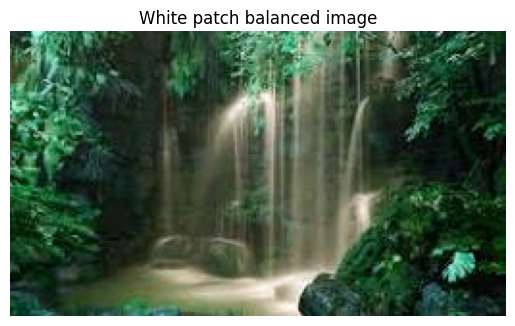

In [11]:
def wp_balance(img_rgb):
    img=img_rgb.astype(float)
    channel_max=img.max(axis=0).max(axis=0) #to find the the brightest pixel per channel
    channel_max[channel_max==0]=1
    gain=255.0/channel_max
    corrected=img*gain.reshape(1,1,3)
    return np.clip(corrected,0,255).astype(np.uint8)
balanced_img=wp_balance(img_rgb)
plt.imshow(img_rgb)
plt.axis("off")
plt.imshow(balanced_img)
plt.title("White patch balanced image")
plt.axis("off")
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.